In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import AKCRiskKit as ark 
%load_ext autoreload
%autoreload 2

## GBM Interactive Plots

<AxesSubplot:>

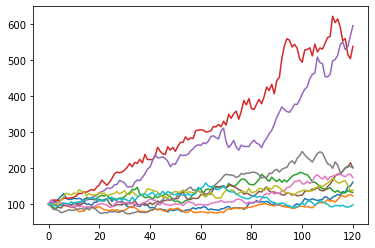

In [2]:
ark.gbm(10,10).plot(legend=False)

In [3]:
def show_gbm(n_scenarios,mu,sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0 = 100
    prices = ark.gbm(n_scenarios=n_scenarios,mu=mu,sigma=sigma,s_0=s_0)
    ax = prices.plot(legend=False,color="indianred",alpha=0.5,linewidth=2,figsize=(12,5))
    ax.axhline(y=s_0,ls=":",color="black")
    ax.set_ylim(top=400)
    ax.plot(0,s_0,marker='o',color="darkred",alpha=0.2)

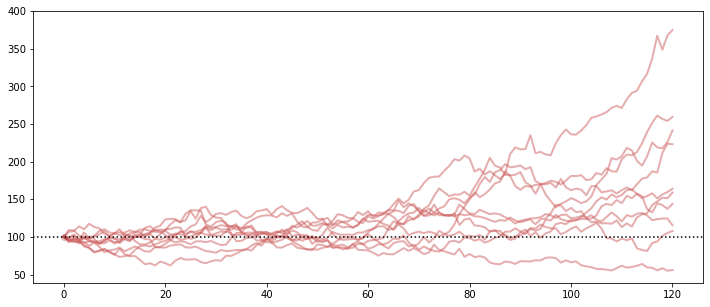

In [4]:
show_gbm(10,0.07,0.15)

In [5]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios = (1,20,1)
                                   ,mu = (-0.2,0.2,0.01)
                                   ,sigma = (0,0.3,0.01))

In [6]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI simulation (Monte Carlo)

In [7]:
import matplotlib.pyplot as plt

In [8]:
def show_cppi(n_scenarios=50,mu=0.7,sigma=0.15,floor=0.,riskfree_rate=0.03,m=3,y_max=100):
    """
    Plot the results of a Monte Carlo simulation of CPPI
    """
    start = 100
    sim_rets = ark.gbm(n_scenarios=n_scenarios,mu=mu,sigma=sigma,steps_per_year=12,prices=False)
    risky_r = pd.DataFrame(sim_rets)
    
    # run the cppi backtest
    btr = ark.run_cppi(risky_r=pd.DataFrame(risky_r),m=m,riskfree_rate=riskfree_rate,start=start,floor=floor)
    wealth=btr["Wealth"]
    
    # Terminal wealth statistics
    
    terminal_wealth = wealth.iloc[-1]
    y_max=wealth.values.max()*y_max/100
    tw_mean=terminal_wealth.mean()
    tw_median=terminal_wealth.median()
    failure_mask=np.less(terminal_wealth,floor*start)
    n_failures=failure_mask.sum()
    p_fail=n_failures/n_scenarios
    
    e_shortfall=np.dot(terminal_wealth - start*floor,failure_mask)/n_failures if n_failures > 0.0 else 0.0
    
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1,ncols=2,sharey=True,gridspec_kw={'width_ratios':[3,2]},figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
     
    wealth.plot(ax=wealth_ax,legend=False,alpha=0.3,color='indianred',figsize=(12,6))
    wealth_ax.axhline(y=start,ls=":",color="black")
    wealth_ax.axhline(y=start*floor,ls="--",color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax,bins=50,ec='w',fc='indianred',orientation='horizontal')
    hist_ax.axhline(y=start,ls=":",color="black")
    hist_ax.axhline(y=tw_mean,ls=":",color="blue")
    hist_ax.axhline(y=tw_median,ls=":",color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}",xy=(0.7,0.9),xycoords='axes fraction',fontsize=18)
    hist_ax.annotate(f"Median: ${int(tw_median)}",xy=(0.7,0.85),xycoords='axes fraction',fontsize=18)
    if floor > 0.01:
        hist_ax.axhline(y=start*floor,ls="--",color="red",linewidth=3)
        hist_ax.annotate(f"e-Shortfall: ${int(e_shortfall)}",xy=(0.7,0.8),xycoords='axes fraction',fontsize=18)

    


cppi_controls = widgets.interactive(show_cppi,
                    n_scenarios = widgets.IntSlider(min=1,max=1000,step=5,value=50)
                    ,mu = (0,0.2,0.01)
                    ,sigma = (0,0.5,0.05)
                    ,floor = (0,2,0.1)
                    ,m=(1,5,0.5)
                    ,riskfree_rate=(0,0.5,0.01)
                    ,y_max = widgets.IntSlider(min=0,max=100,step=1,value=100,
                                              description="Zoom Y-Axis")
                )





In [9]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…